# <center style='color:orange'>`GradientBoostingClassifier` using Scikit-Learn</center>

# 1. Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# 2. Load `credit_approval` dataset

In [2]:
df = pd.read_csv('credit_approval.csv')
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [3]:
df.shape

(690, 16)

In [4]:
df.A16.unique()

array(['+', '-'], dtype=object)

In [5]:
df.A16.value_counts()

-    383
+    307
Name: A16, dtype: int64

# 3. Perform preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [7]:
cat_features = [i for i in df.columns if df.dtypes[i] == 'object']
cat_features

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']

In [8]:
labelencoder = LabelEncoder()
for j in cat_features:
    df[j] = labelencoder.fit_transform(df[j])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


# 4. Drop null values

In [9]:
new_df = df.dropna()
new_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


In [10]:
new_df.shape

(666, 16)

In [11]:
new_df.A16.unique()

array([0, 1])

In [12]:
new_df.A16.value_counts()

1    367
0    299
Name: A16, dtype: int64

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      666 non-null    int64  
 1   A2      666 non-null    float64
 2   A3      666 non-null    float64
 3   A4      666 non-null    int64  
 4   A5      666 non-null    int64  
 5   A6      666 non-null    int64  
 6   A7      666 non-null    int64  
 7   A8      666 non-null    float64
 8   A9      666 non-null    int64  
 9   A10     666 non-null    int64  
 10  A11     666 non-null    int64  
 11  A12     666 non-null    int64  
 12  A13     666 non-null    int64  
 13  A14     666 non-null    float64
 14  A15     666 non-null    int64  
 15  A16     666 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 88.5 KB


# 5. Separate features and classes

In [14]:
X = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

# 6. Split the dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1) 

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(532, 134, 532, 134)

# 7. Apply `GradientBoostingClassifier`

In [17]:
gbc = GradientBoostingClassifier(learning_rate=0.5, n_estimators=10, max_depth=2, random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=10,
                           random_state=1)

In [18]:
print('Accuracy on the train set:', round(gbc.score(X_train, y_train), 4))
print('Accuracy on the test set:', round(gbc.score(X_test, y_test), 4))

Accuracy on the train set: 0.9117
Accuracy on the test set: 0.8806


# 8. Plot `confusion_matrix`

In [19]:
y_pred = gbc.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=gbc.classes_)

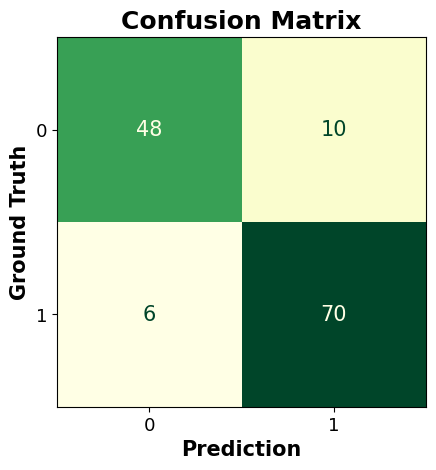

In [20]:
disp.plot(cmap='YlGn', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [21]:
y_test.value_counts()

1    76
0    58
Name: A16, dtype: int64

In [22]:
cat_labels = ['+', '-']
y_pred = gbc.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=cat_labels)

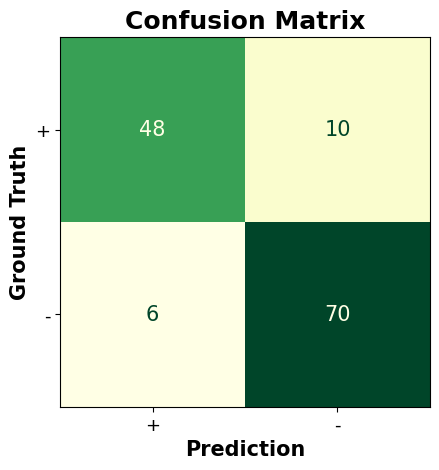

In [23]:
disp.plot(cmap='YlGn', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [24]:
print('F1 score:', round(metrics.f1_score(y_test, y_pred), 4))
print('ROC-AUC score:', round(metrics.roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1]), 4))

F1 score: 0.8974
ROC-AUC score: 0.9311


# 9. Print `classification_report`

In [25]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        58
           1       0.88      0.92      0.90        76

    accuracy                           0.88       134
   macro avg       0.88      0.87      0.88       134
weighted avg       0.88      0.88      0.88       134



# 10. Feature importance

In [26]:
fi = pd.DataFrame(gbc.feature_importances_, index=gbc.feature_names_in_, columns=['Importance'])
fi

,Importance
A1,0.000000
A2,0.009042
A3,0.017332
A4,0.017973
A5,0.008950
A6,0.006277
A7,0.003830
A8,0.018077
A9,0.767323
A10,0.048627


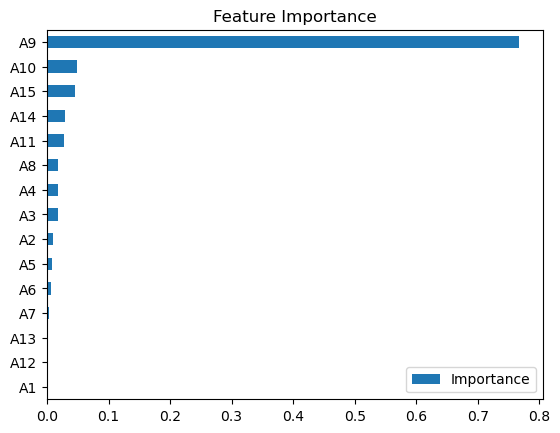

In [27]:
fi.sort_values('Importance').plot(kind='barh', title='Feature Importance').legend(loc=4);